# Testing PFSS Integration
Recently added a reader for PFSS output. Want to test how well it works.

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from scipy.io import readsav
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord
import astropy.time
from sunpy.sun import constants
from sunpy.map import Map,GenericMap
from sunpy.net import Fido,attrs as a,vso
from sunpy.time import TimeRange
import sunpy.coordinates
from sunpy.util.metadata import MetaDict
import sunpy.time

import synthesizAR
import synthesizAR.extrapolate

%matplotlib inline

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pfss = readsav('/Users/willbarnes/Desktop/pfss_test.sav')

In [3]:
fieldlines = synthesizAR.extrapolate.from_pfsspack(pfss)

In [5]:
q = Fido.search(a.Time(TimeRange('2011/02/12 12:03:30', '2011/02/12 12:04:30')),
                a.Instrument('HMI'), vso.attrs.Physobs('LOS_magnetic_field'))

In [4]:
#res = Fido.fetch(q)
res = '/Users/willbarnes/sunpy/data/hmi_m_45s_2011_02_12_12_05_15_tai_magnetogram.fits'

In [5]:
magnetogram = Map(res)

In [6]:
magnetogram = magnetogram.rotate(order=3)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


In [7]:
blc = SkyCoord(-500*u.arcsec, -400*u.arcsec, frame=magnetogram.coordinate_frame)
trc = SkyCoord(-150*u.arcsec, -75*u.arcsec, frame=magnetogram.coordinate_frame)
magnetogram_ar = magnetogram.submap(blc,trc)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


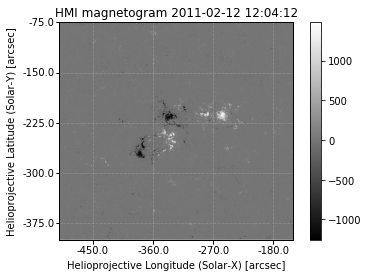

In [8]:
magnetogram_ar.peek()
plt.show()

In [24]:
new_fieldlines = []
for f,b in fieldlines:
    dx, dy, dz = np.diff(f.cartesian.x), np.diff(f.cartesian.y), np.diff(f.cartesian.z)
    full_length = np.sqrt(dx**2 + dy**2 + dz**2).sum()
    if full_length > 150 * u.Mm:
        continue
    new_fieldlines.append((f,b))

In [26]:
active_region = synthesizAR.Field(magnetogram_ar, new_fieldlines)

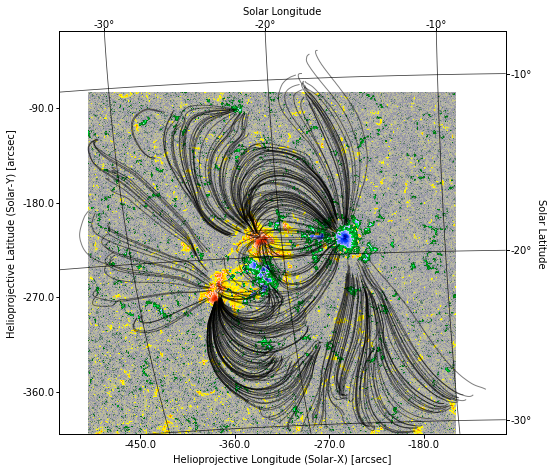

In [30]:
active_region.peek(line_frequency=10)